In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [137]:
df=pd.read_csv('/content/drive/MyDrive/files/Mall_Customers.csv')

In [138]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [140]:
df.shape

(200, 5)

In [141]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [142]:
df.value_counts()

,,,,,count
CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,1
4,Female,23,16,77,1
5,Female,31,17,40,1
...,...,...,...,...,...
196,Female,35,120,79,1
197,Female,45,126,28,1
198,Male,32,126,74,1


In [143]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [144]:
import warnings
warnings.filterwarnings("ignore")

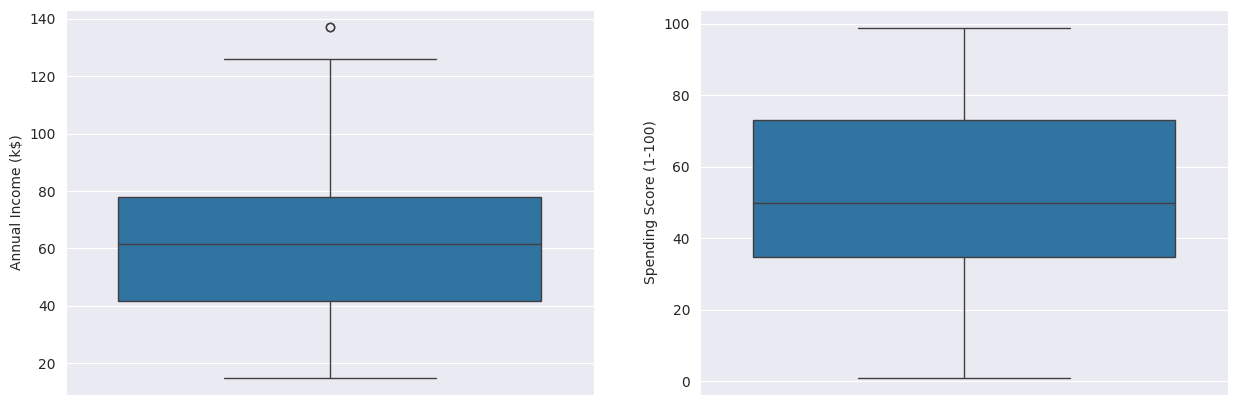

In [145]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")

plt.subplot(1,2,2)
sns.boxplot(data=df, y="Spending Score (1-100)")

plt.show()

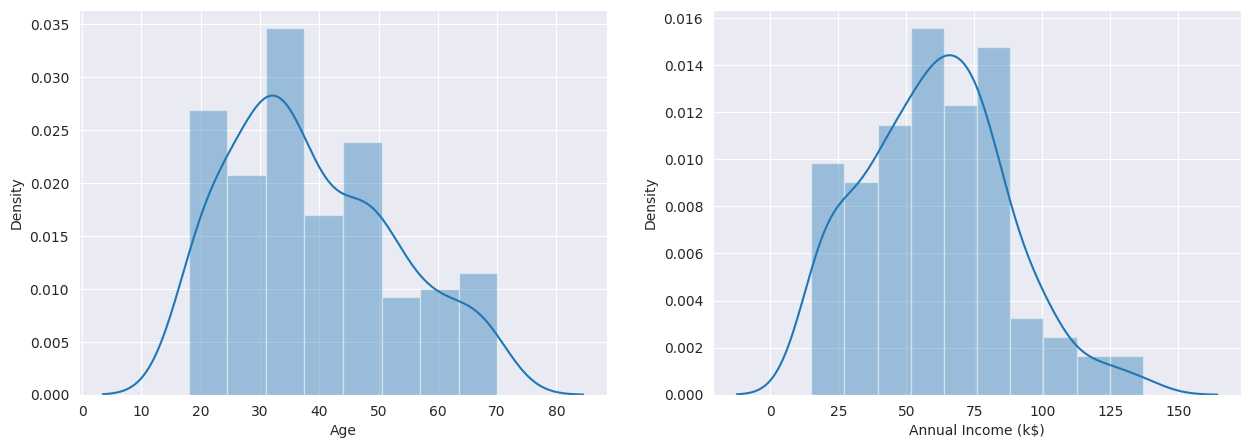

In [146]:
plt.figure(figsize=(15,5))
sns.set_style("darkgrid")

plt.subplot(1,2,1)
sns.distplot(df['Age'])

plt.subplot(1,2,2)
sns.distplot(df['Annual Income (k$)'])

plt.show()

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

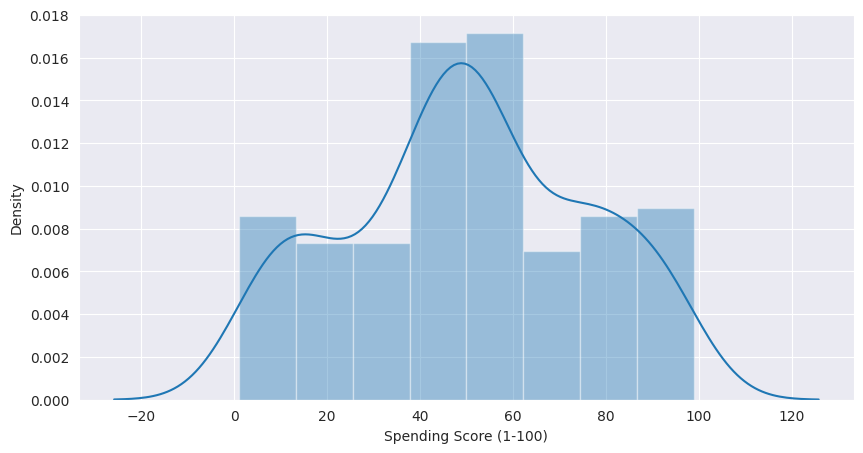

In [147]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.distplot(df['Spending Score (1-100)'])

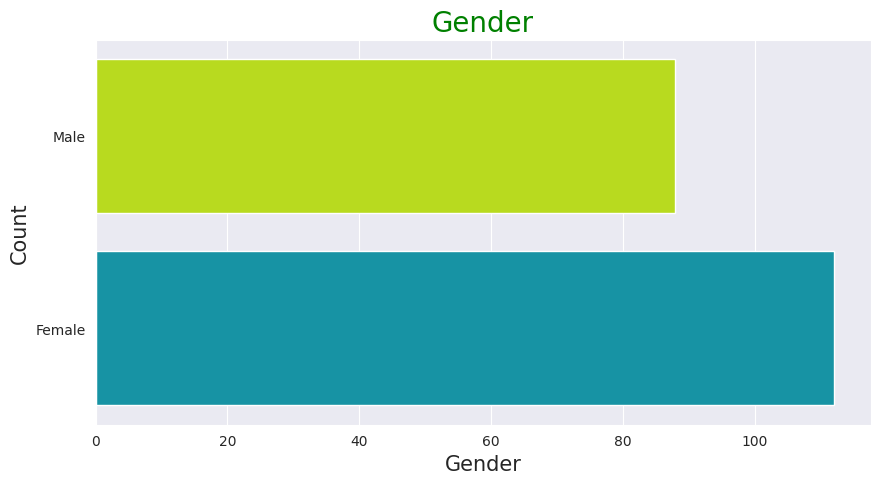

In [148]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')

plt.title("Gender", fontsize=20, color="green")
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Count", fontsize=15)
sns.countplot(df.Genre, palette="nipy_spectral_r")
plt.show()

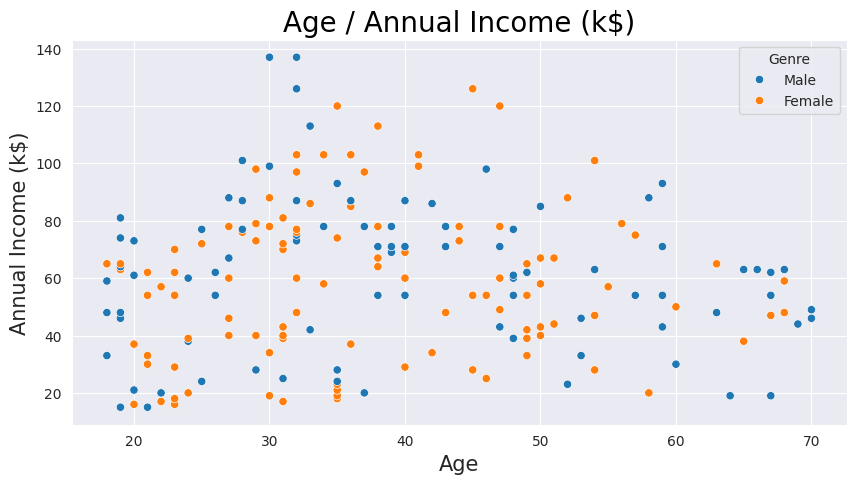

In [149]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.scatterplot(data=df, x="Age", y= "Annual Income (k$)", hue="Genre")
plt.title("Age / Annual Income (k$)", fontsize=20, color="black")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

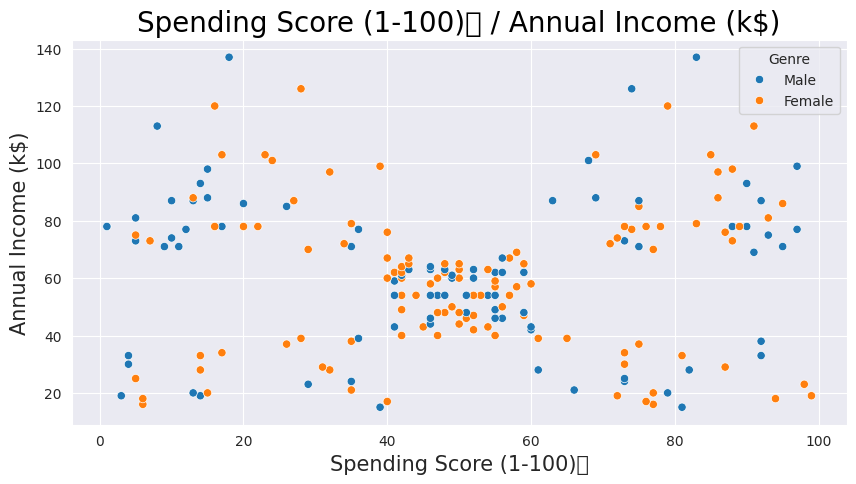

In [150]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.scatterplot(data=df, x="Spending Score (1-100)", y= "Annual Income (k$)", hue="Genre")
plt.title("Spending Score (1-100)	 / Annual Income (k$)", fontsize=20, color="black")
plt.xlabel("Spending Score (1-100)	", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

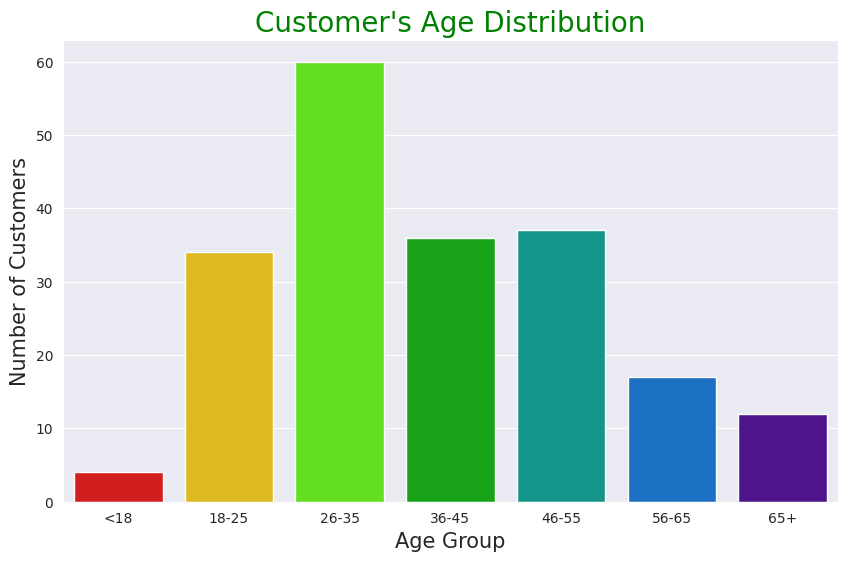

In [151]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ["<18", "18-25", "26-35", "36-45", "46-55", "56-65", "65+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

plt.figure(figsize=(10,6))
sns.countplot(x="AgeGroup", data=df, palette="nipy_spectral_r")
plt.title("Customer's Age Distribution", fontsize=20, color="green")
plt.xlabel("Age Group", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()

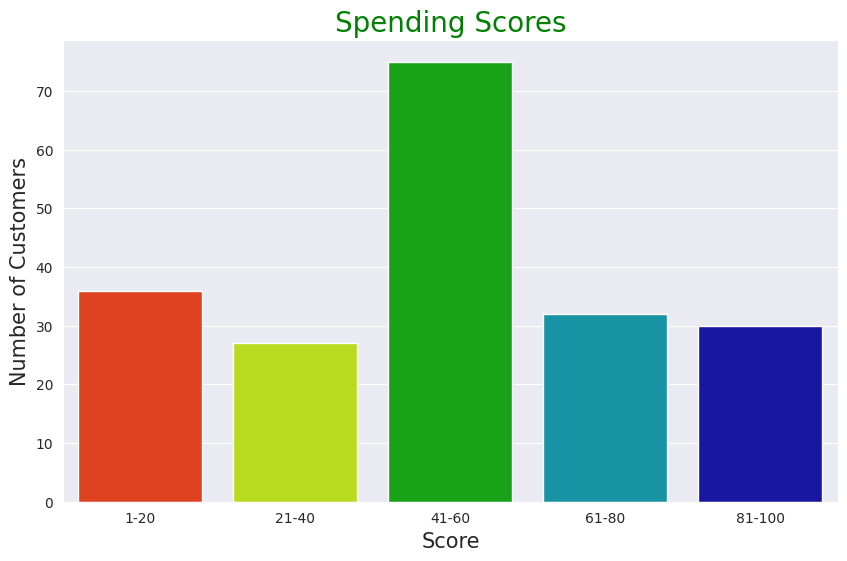

In [152]:
bins = [0, 20, 40, 60, 80, 100]
labels = ["1-20", "21-40", "41-60", "61-80", "81-100"]
df["SpendingGroup"] = pd.cut(df["Spending Score (1-100)"], bins=bins, labels=labels)

plt.figure(figsize=(10,6))
sns.countplot(x="SpendingGroup", data=df, palette="nipy_spectral_r")
plt.title("Spending Scores", fontsize=20, color="green")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()


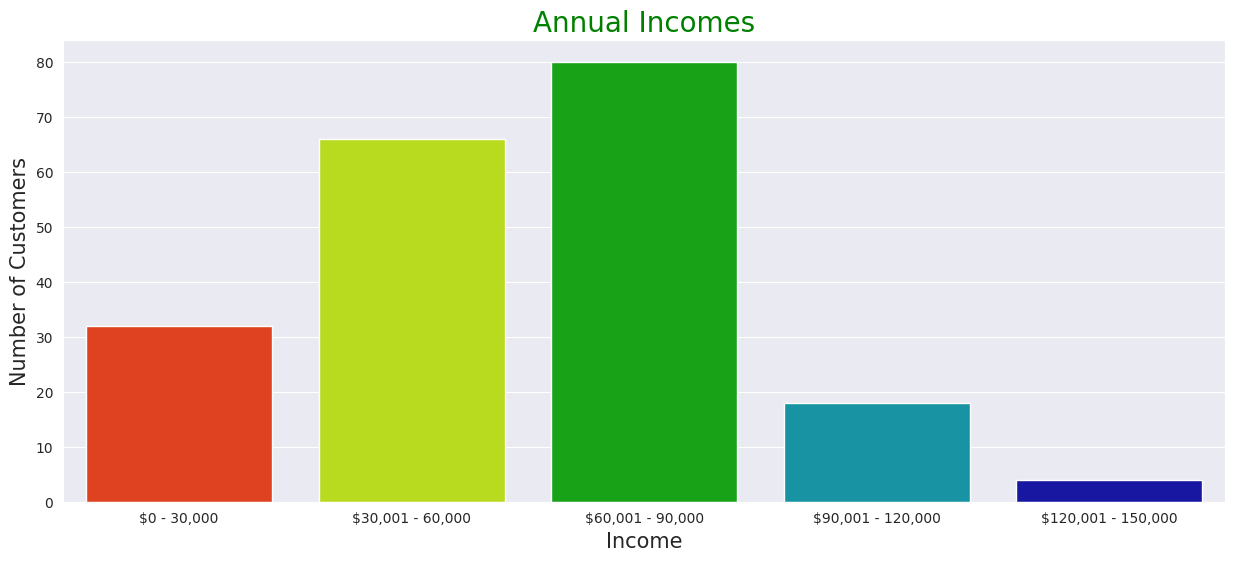

In [153]:
bins = [0, 30, 60, 90, 120, 150]
labels = ["$0 - 30,000", "$30,001 - 60,000", "$60,001 - 90,000", "$90,001 - 120,000", "$120,001 - 150,000"]
df["IncomeGroup"] = pd.cut(df["Annual Income (k$)"], bins=bins, labels=labels)

plt.figure(figsize=(15,6))
sns.countplot(x="IncomeGroup", data=df, palette="nipy_spectral_r")
plt.title("Annual Incomes", fontsize=20, color="green")
plt.xlabel("Income", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()


In [154]:
df_scaled = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
scaler = StandardScaler()
df_scaled_fit = scaler.fit_transform(df_scaled)

In [155]:
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled_fit.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [156]:
var_list = df_scaled_fit[["Annual Income (k$)","Spending Score (1-100)"]]
var_list

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [157]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=4)

In [158]:
kmeans.labels_

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [159]:
ssd = []

for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(var_list)

    ssd.append(kmeans.inertia_)

In [160]:
ssd

[399.99999999999994,
 274.7363550450323,
 157.70400815035939,
 108.92131661364358,
 65.57885579985046,
 55.37581558455639,
 52.053987442273765,
 43.54029690580889,
 34.12072149850158,
 31.266777675775796]

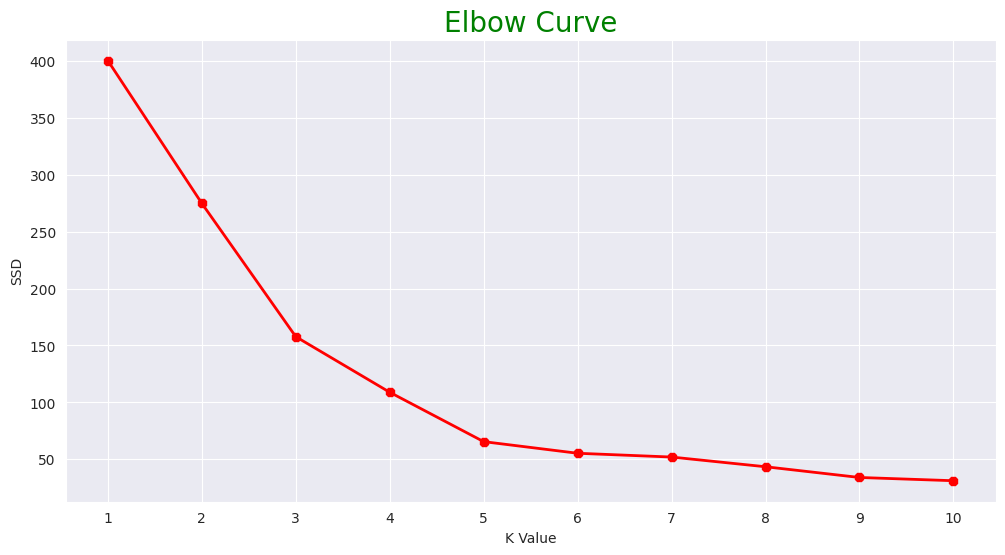

In [161]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()

 K=5 and rebuild the cluster.

In [162]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=5)

In [163]:
kmeans.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [164]:
df["Label"] = kmeans.labels_

In [165]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingGroup,IncomeGroup,Label
0,1,Male,19,15,39,18-25,21-40,"$0 - 30,000",3
1,2,Male,21,15,81,18-25,81-100,"$0 - 30,000",4
2,3,Female,20,16,6,18-25,1-20,"$0 - 30,000",3
3,4,Female,23,16,77,18-25,61-80,"$0 - 30,000",4
4,5,Female,31,17,40,26-35,21-40,"$0 - 30,000",3


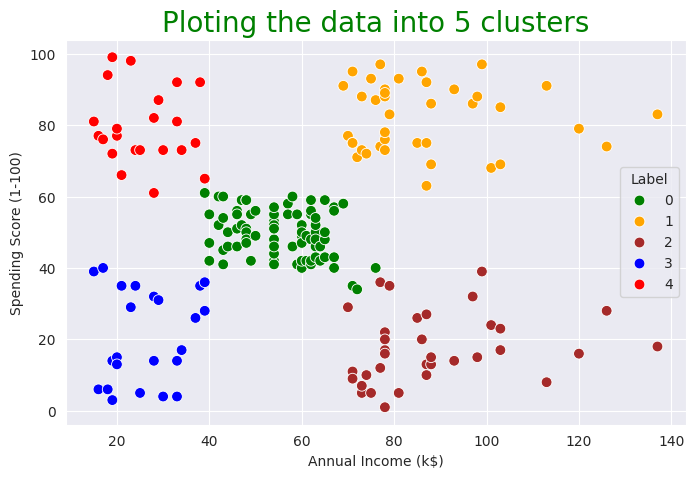

In [166]:
# When k=5
plt.figure(figsize=(8,5))

plt.title("Ploting the data into 5 clusters", fontsize=20, color="green")
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", s=60, palette=['green','orange','brown','blue','red'])
plt.show()

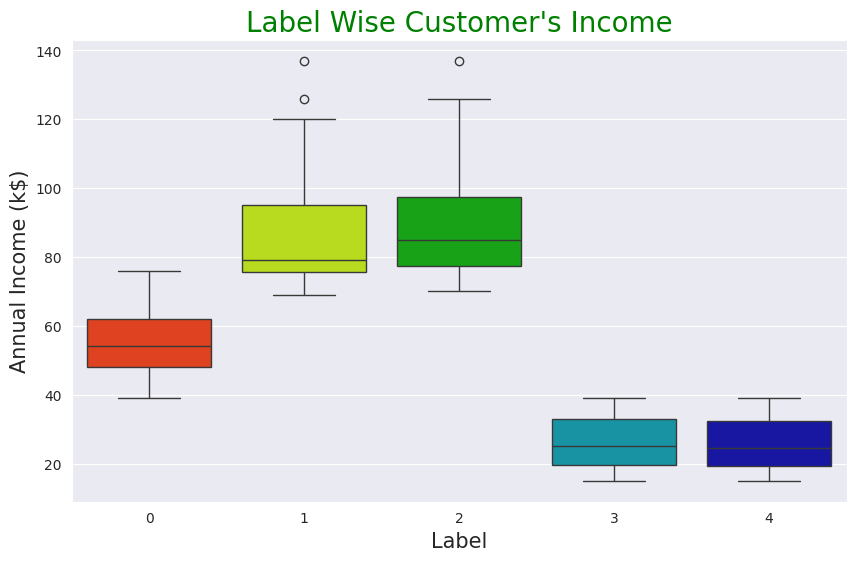

In [167]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Label', y='Annual Income (k$)', data=df, palette="nipy_spectral_r")
plt.title("Label Wise Customer's Income", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="Annual Income (k$)",fontsize=15)
plt.show()

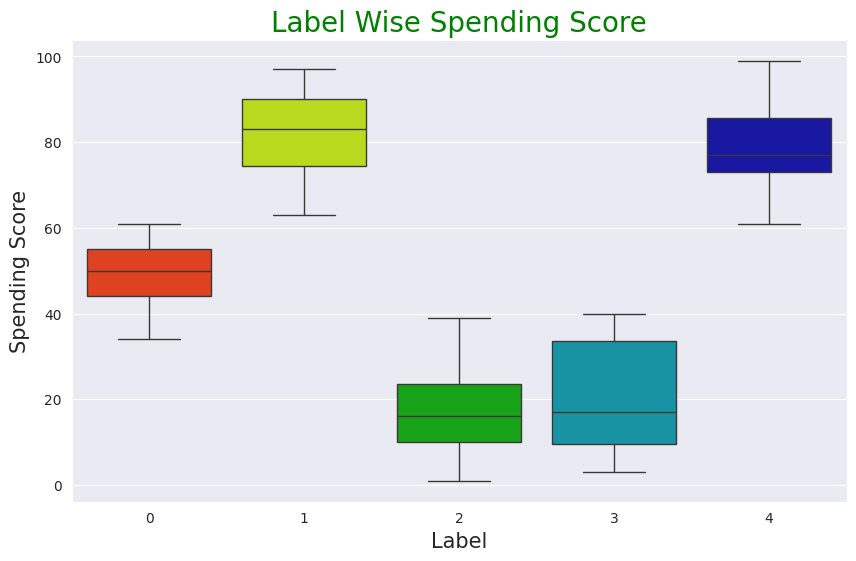

In [168]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Label', y='Spending Score (1-100)', data=df, palette="nipy_spectral_r")
plt.title("Label Wise Spending Score", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="Spending Score",fontsize=15)
plt.show()

In [169]:
for label, group in df.groupby("Label"):
    print(f"The number of customers in group {label+1} = {len(group)}")
    print(f"The Customer IDs are - {group.CustomerID.values}")
    print("-"*50)

The number of customers in group 1 = 81
The Customer IDs are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
--------------------------------------------------
The number of customers in group 2 = 39
The Customer IDs are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------------
The number of customers in group 3 = 35
The Customer IDs are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------------
The number of customers i

In [170]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingGroup,IncomeGroup,Label
0,1,Male,19,15,39,18-25,21-40,"$0 - 30,000",3
1,2,Male,21,15,81,18-25,81-100,"$0 - 30,000",4
2,3,Female,20,16,6,18-25,1-20,"$0 - 30,000",3
3,4,Female,23,16,77,18-25,61-80,"$0 - 30,000",4
4,5,Female,31,17,40,26-35,21-40,"$0 - 30,000",3


In [171]:

var_list_1 = df_scaled_fit[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [172]:
var_list_1.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [173]:
kmeans1 = KMeans(n_clusters=5, max_iter=50)
kmeans1.fit(var_list_1)

KMeans(max_iter=50, n_clusters=5)

In [174]:
kmeans1.labels_


array([3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 4, 3, 3, 3, 0, 0, 0, 0, 3, 4, 1, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [175]:
df["Label"] = kmeans1.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingGroup,IncomeGroup,Label
0,1,Male,19,15,39,18-25,21-40,"$0 - 30,000",3
1,2,Male,21,15,81,18-25,81-100,"$0 - 30,000",3
2,3,Female,20,16,6,18-25,1-20,"$0 - 30,000",2
3,4,Female,23,16,77,18-25,61-80,"$0 - 30,000",3
4,5,Female,31,17,40,26-35,21-40,"$0 - 30,000",3


In [176]:
ssd = []

for num_clusters in range(1,11):
    kmeans1 = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans1.fit(var_list_1)

    ssd.append(kmeans1.inertia_)

Text(0, 0.5, 'SSD')

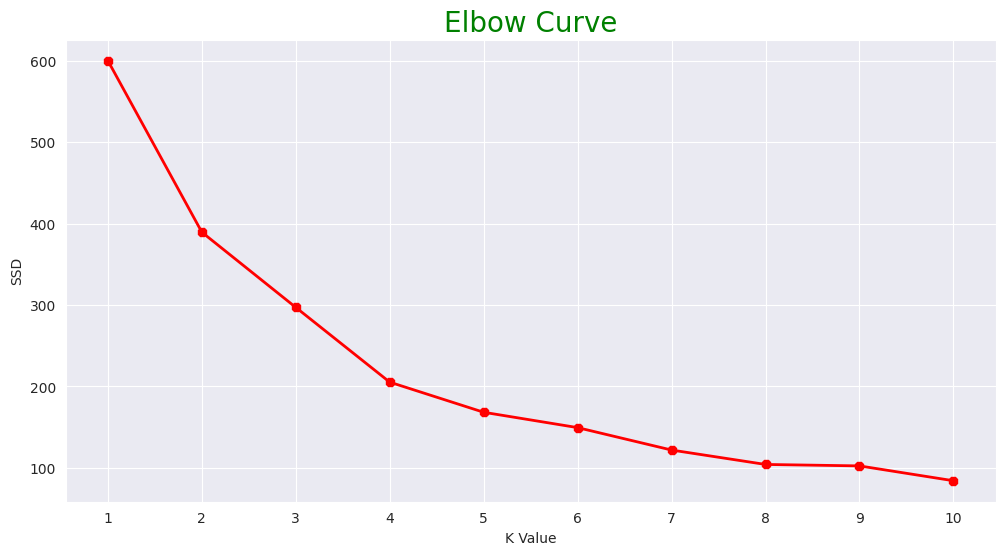

In [177]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")


In [178]:
from mpl_toolkits.mplot3d import Axes3D


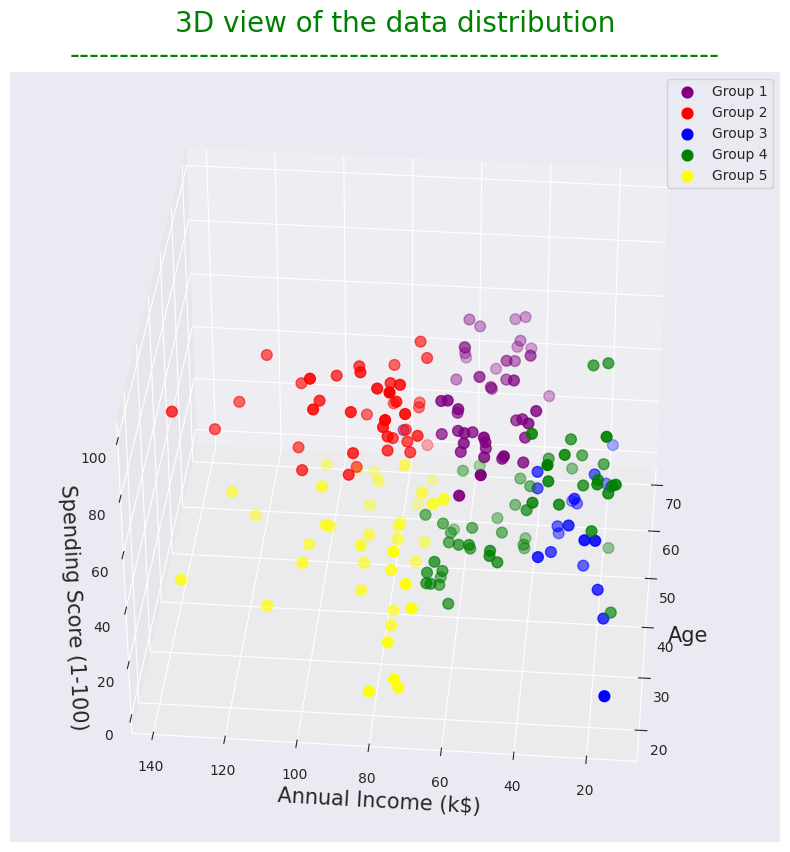

In [179]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['purple', 'red', 'blue', 'green', 'yellow']


for label, color in enumerate(colors):
    cluster = df[df.Label == label]
    ax.scatter(
        cluster.Age,
        cluster["Annual Income (k$)"],
        cluster["Spending Score (1-100)"],
        c=color,
        s=60,
        label=f'Group {label+1}'
    )

ax.view_init(35, 185)

plt.title("3D view of the data distribution\n" + "-"*65, fontsize=20, color="green")
ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("Annual Income (k$)", fontsize=15)
ax.set_zlabel("Spending Score (1-100)", fontsize=15)


plt.legend()
plt.show()


In [180]:
for label, group in df.groupby("Label"):
    print(f"The number of customers in group {label+1} = {len(group)}")
    print(f"The Customer IDs are - {group.CustomerID.values}")
    print("-"*50)

The number of customers in group 1 = 47
The Customer IDs are - [ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73
  74  75  77  78  80  81  83  84  86  87  90  91  93  94  97  99 102 103
 105 107 108 109 110 111 117 118 119 120 161]
--------------------------------------------------
The number of customers in group 2 = 40
The Customer IDs are - [123 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156
 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192
 194 196 198 200]
--------------------------------------------------
The number of customers in group 3 = 20
The Customer IDs are - [ 3  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 43 45]
--------------------------------------------------
The number of customers in group 4 = 54
The Customer IDs are - [  1   2   4   5   6   8  10  12  14  16  18  20  22  24  26  28  30  32
  34  36  38  40  42  44  46  48  49  50  52  53  59  62  66  69  70  76
  79  82  85  88  89  92  95  9